# HOUSE PRICE PREDICTION (Multiple linear Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import utils

In [2]:
df = pd.read_excel("HousePricePrediction.xlsx")
 

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

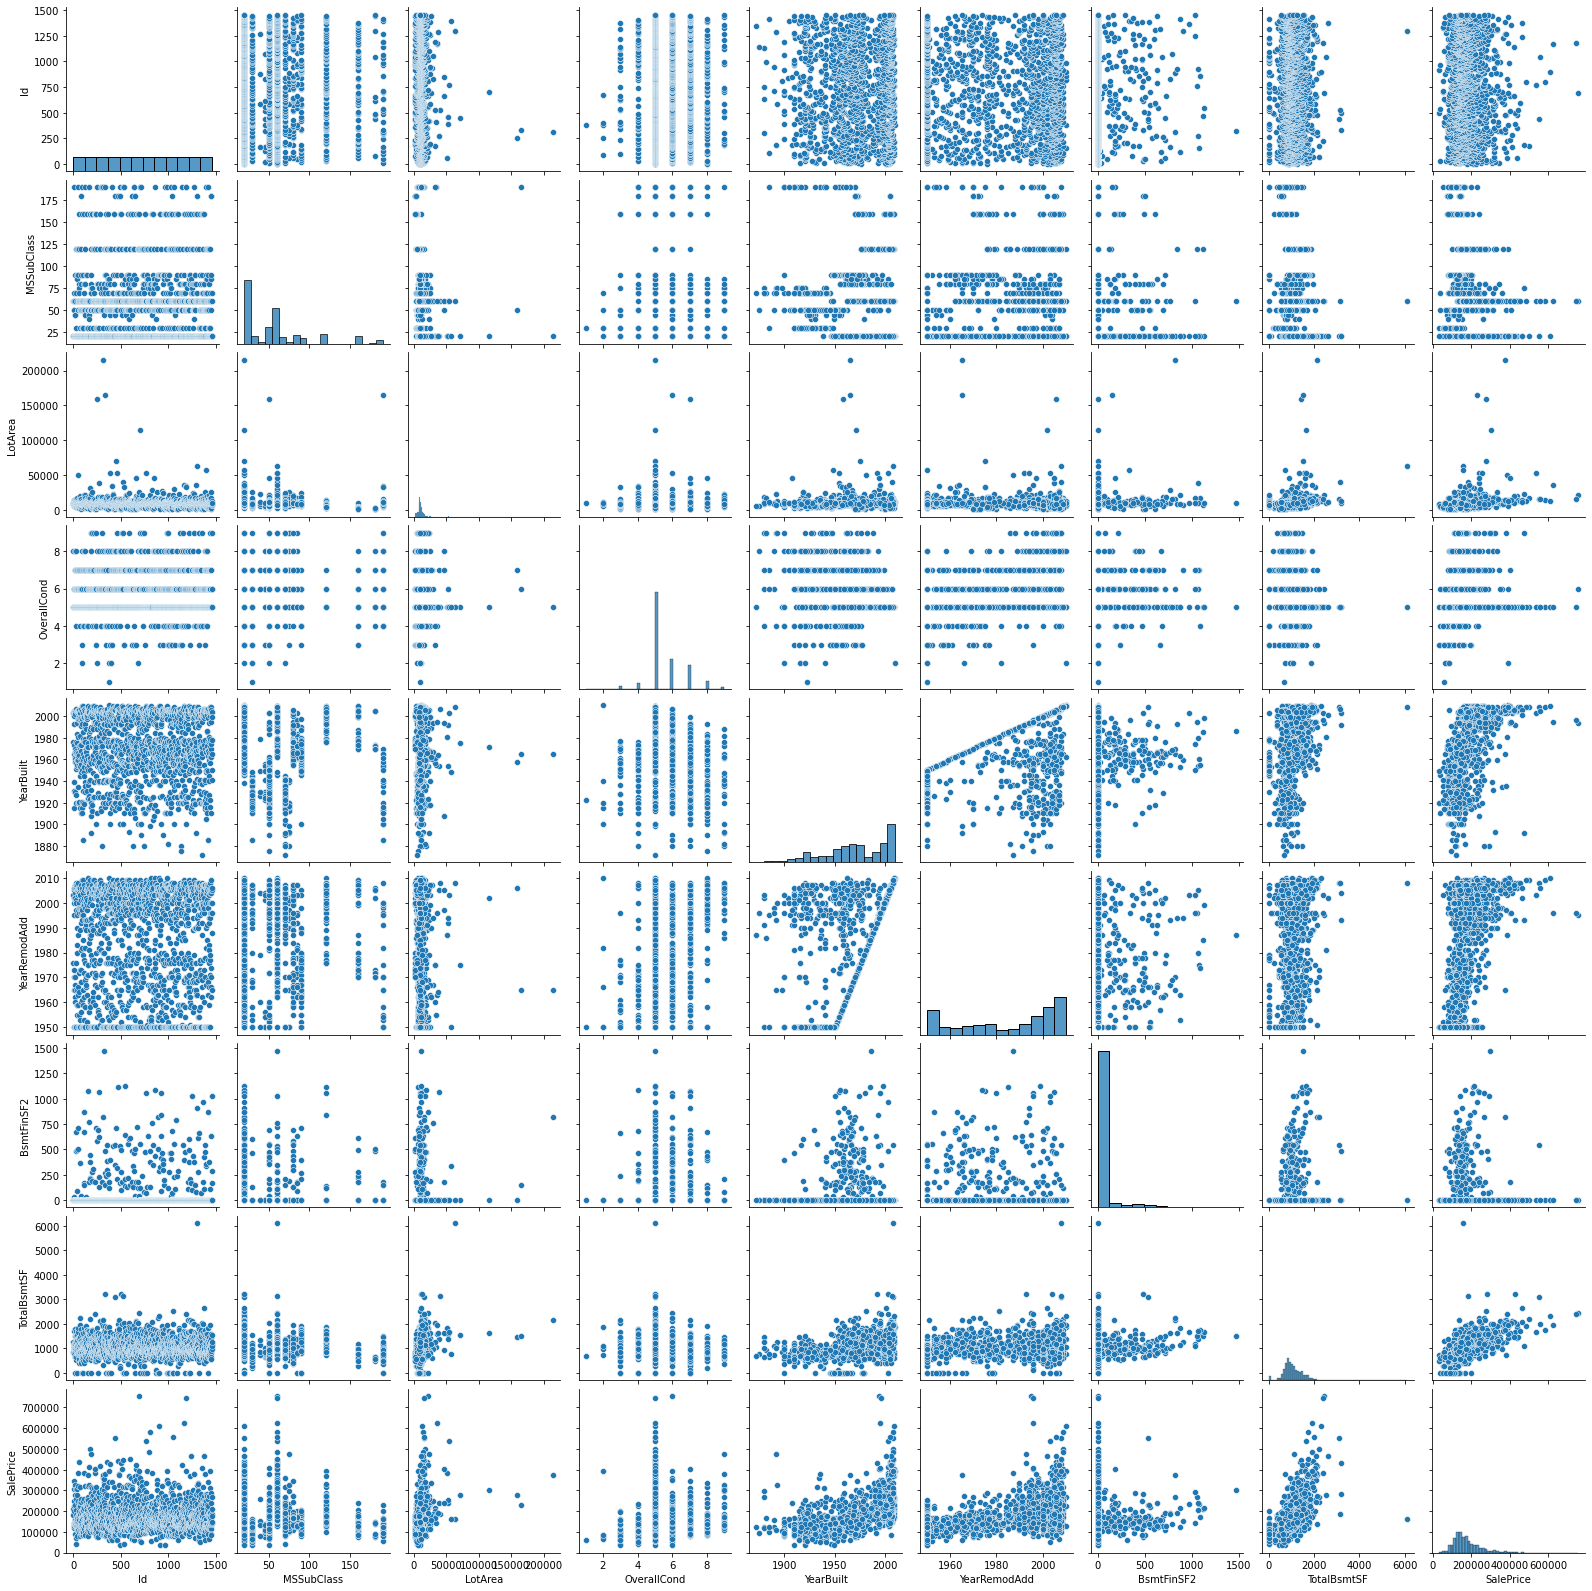

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

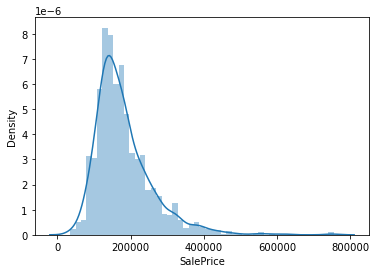

In [10]:
sns.distplot(df['SalePrice'])

<AxesSubplot:>

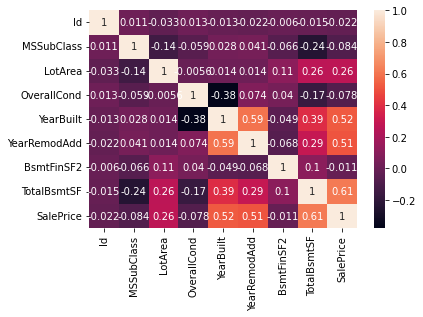

In [11]:
sns.heatmap(df.corr(), annot =True)

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [35]:
X=df[[ 'MSSubClass',  'LotArea', 
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2',
       'TotalBsmtSF']]
y=df['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression()

In [41]:
print(lm.intercept_)

-2844694.4283213527


In [42]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MSSubClass,99.101906
LotArea,1.673541
OverallCond,4118.038480
YearBuilt,685.211668
YearRemodAdd,774.147062
BsmtFinSF2,-26.364201
TotalBsmtSF,87.934185


In [43]:
predictions = lm.predict(X_test)

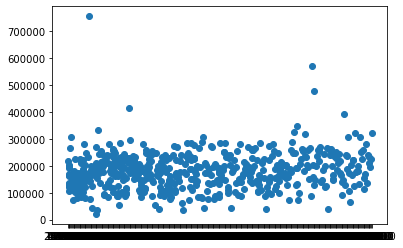

In [44]:
plt.scatter(y_test,predictions)

In [45]:

from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 37570.81293239446
MSE: 3414832734.924099
RMSE: 58436.57018446667


# THANK YOU !